### Importing Libraries

In [67]:
import json # will be needed for saving preprocessing details
import numpy as np # for data manipulation
import pandas as pd # for data manipulation
import matplotlib as plt # for data viz
from sklearn.model_selection import train_test_split # will be used for data split
from sklearn.preprocessing import LabelEncoder # for preprocessing
from sklearn.ensemble import RandomForestClassifier # for training the algorithm
from sklearn.ensemble import ExtraTreesClassifier # for training the algorithm
import joblib # for saving algorithm and preprocessing objects

### Data Loading

In [68]:
df = pd.read_csv('https://raw.github.com/ImaneBenHassine/Income-Prediction-and-Deploy-with-Django/master/income.csv',
                 skipinitialspace=True)

In [69]:
x_cols = [c for c in df.columns if c != 'income']
# set input matrix and target column
X = df[x_cols]
y = df['income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The X matrix has 32,561 rows and 14 columns

The y vector has 32,561 values indicating whether income exceeds or less than 50K per year.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [71]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Count of each column is 32561 showing there are no null values. 
Mean is very much greater than the median in capital gain and capital loss stating that there is high skewness present and data is skewed to the right side. 
Also there is high variance in Capital gain and Capital loss column. 
Min, Max, and interquartile ranges have variable difference, that means there are outliers present in the data.
The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [72]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
income                2
dtype: int64

In [73]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:ylabel='income'>

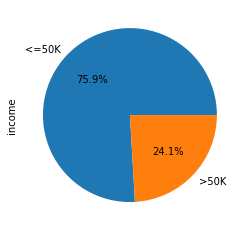

In [74]:
df['income'].value_counts().plot.pie(autopct='%1.1f%%')


### Data Pre-processing

Using the Random Forest algorithm  for ML algorithm training which it can not handle missing values and categorical columns, that's why we need to apply pre-processing algorithms.

Using the most frequent value in each column to fill missing values.

Using LabelEncoder from sklearn package convert categoricals into numbers 

In [75]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

The columns workclass, occupation, and native.country contains null values that need to be deal with it

since they are categorical feature we will impute them using mode!

In [76]:
#for col in ['workclass', 'occupation', 'native-country']:
    #df[col].fillna(df[col].mode()[0], inplace=True)

train_mode = dict(X.mode().iloc[0])
X = X.fillna(train_mode)
print(train_mode)    


{'age': 36.0, 'workclass': 'Private', 'fnlwgt': 123011, 'education': 'HS-grad', 'education-num': 9.0, 'marital-status': 'Married-civ-spouse', 'occupation': 'Prof-specialty', 'relationship': 'Husband', 'race': 'White', 'sex': 'Male', 'capital-gain': 0.0, 'capital-loss': 0.0, 'hours-per-week': 40.0, 'native-country': 'United-States'}


In [77]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [79]:
encoders={}

for feature in ['workclass','education', 'marital-status', 'occupation',
               'relationship','race', 'sex','native-country']:
    
        le = LabelEncoder()
        
        X[feature] = le.fit_transform(X[feature])
        
        encoders[feature]=le

In [80]:
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38


### Train Split Test

Target column has only two categories, it is a problem of Binary classification.

Dataset if highly imbalanced. There is less than 25% of >50K income category while more than 75% of <=50K income.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

split our data into training, and testing subsets before starting data preprocessing, using 30% of the data for testing.

In [82]:
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [83]:
X_train.workclass.value_counts()

3    17220
5     1763
1     1447
6      894
4      774
0      679
7       11
2        4
Name: workclass, dtype: int64

In [84]:
X_test.workclass.value_counts()

3    7312
5     778
1     646
6     404
4     342
0     281
7       3
2       3
Name: workclass, dtype: int64

In [85]:
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
1055,32,3,87643,9,13,2,11,0,4,1,0,0,40,38
26305,27,3,207352,9,13,2,12,0,1,1,0,0,40,18
9568,73,6,74040,5,4,0,7,1,1,0,0,0,40,38
15071,39,3,174924,11,9,5,3,1,4,1,14344,0,40,38
2012,31,3,264936,15,10,4,7,1,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19433,59,3,367984,9,13,2,9,0,4,1,0,0,40,38
12825,26,3,144483,8,11,0,11,3,4,0,594,0,35,38
23420,55,3,98361,9,13,2,3,0,4,1,15024,0,55,38
6259,24,1,150084,15,10,5,10,1,4,1,0,0,60,38


In [86]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
29700,37,3,34146,11,9,2,2,0,4,1,0,0,68,38
1529,37,3,26898,11,9,0,3,4,4,0,0,0,12,38
27477,26,3,190762,15,10,2,11,0,4,1,0,0,18,38
31950,35,3,189092,9,13,2,3,0,4,1,0,0,40,38
4732,23,3,260019,5,4,4,4,4,3,1,0,0,36,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27852,24,3,223367,1,7,4,2,4,4,1,0,0,40,38
23605,20,3,127185,15,10,4,9,3,4,0,0,0,15,38
1318,41,6,144928,9,13,2,9,0,4,1,0,0,40,38
25299,40,3,199303,11,9,2,2,0,4,1,0,0,40,38


### Algorithm training

train Random Forest algorithm

In [87]:
rf = RandomForestClassifier(n_estimators = 100)
rf = rf.fit(X_train, y_train)

train Extra Trees algorithm

In [88]:
et = ExtraTreesClassifier(n_estimators = 100)
et = et.fit(X_train, y_train)

In [89]:
score_rf = rf.score(X_test, y_test)
score_et = et.score(X_test, y_test)
print(score_rf)
print(score_et)

0.8525949431876344
0.8383662606203296


In [90]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rf.score(X_test, y_test)))

Training set score: 0.9999
Test set score: 0.8526


In [91]:
# check class distribution in test set

y_test.value_counts()

<=50K    7469
>50K     2300
Name: income, dtype: int64

We can see that the occurences of most frequent class is 7469. So, we can calculate null accuracy by dividing 7469 by total number of occurences.

In [92]:
# check null accuracy score

null_accuracy = (7469/(7469+2300))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7646


### Confusion matrix

A confusion matrix is a tool for summarizing the performance of a classification algorithm. Can give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category :

True Positives (TP) : occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) : occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) : occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) : occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class which is a very serious error and it is called Type II error.

In [93]:
from sklearn.metrics import confusion_matrix

y_pred=rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[6930,  539],
       [ 901, 1399]], dtype=int64)

<AxesSubplot:>

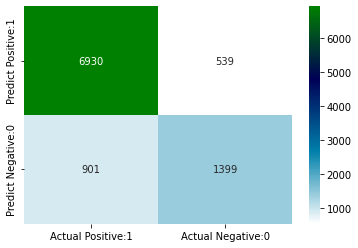

In [94]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='ocean_r')

The confusion matrix shows 6901 + 1394 = 8295 correct predictions and 568 + 906 = 1474 incorrect predictions

### Classification metrices

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model.

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.91      7469
        >50K       0.72      0.61      0.66      2300

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.85      0.85      0.85      9769



In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [97]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9278


Precision can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. 

So, Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

Mathematically,is the ratio of TP to (TP + FP)

In [98]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8526


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. 

Recall is also called Sensitivity.

Recall identifies the proportion of correctly predicted actual positives.

Mathematically, recall can be given as the ratio of TP to (TP + FN).

In [99]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8849


In [100]:
false_positive_rate = FP / float(FP + TN)

print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2781


In [101]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7219


In [102]:
f1=2*((precision*recall)/(precision+recall))
print('f1-score : {0:0.4f}'.format(f1))

f1-score : 0.9059


f1-score is the weighted harmonic mean of precision and recall. The best possible f1-score would be 1.0 and the worst would be 0.0. f1-score is the harmonic mean of precision and recall. So, f1-score is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of f1-score should be used to compare classifier models, not global accuracy.

### Conclusion

The RandomForeast yields a very good performance as indicated by the model accuracy which was found to be 0.8491.

In order to save the algorithm that we have created needs also to save pre-processing variables train_mode and encoders as well. For saving, I will use joblib package.

In [103]:
joblib.dump(train_mode, "./train_mode.joblib", compress=True)
joblib.dump(encoders, "./encoders.joblib", compress=True)
joblib.dump(rf, "./random_forest.joblib", compress=True)
joblib.dump(et, "./extra_trees.joblib", compress=True)

['./extra_trees.joblib']